In [ ]:
import tensorflow as tf
print("Version of tensorflow is : " , tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

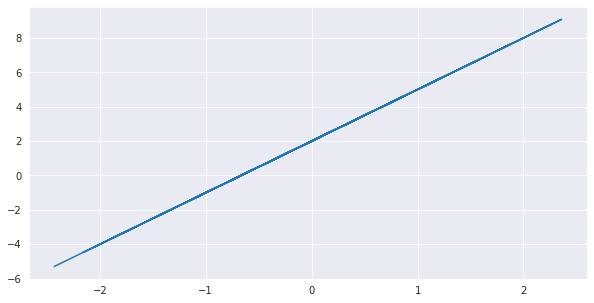

In [39]:
num_sample = 1000
true_w     = 3.0
true_b     = 2.0  
epochs     = 40
learning_rate = 0.1
x = tf.random.normal([num_sample])
y = true_w * x + true_b

plt.figure(figsize = (10 , 5))
plt.plot(x.numpy()[:50] , y.numpy()[:50])

In [13]:
def loss(y_pred , y_true):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [14]:
class Model():
    def  __init__(self):
        self.w = tf.Variable(5.0 , trainable=True)
        self.b = tf.Variable(0.0 , trainable=True)
    def __call__(self,input):
        pred = self.w * input + self.b
        return pred

In [51]:
def train(model , x , y , learning_rate , epochs = 100 , print_freq = None):
    history = {}
    history['loss'] = []
    history['w']    = []
    history['b']    = []
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            model_loss = loss(model(x) , y)
        dw , db = tape.gradient(model_loss , [model.w , model.b])
        model.w.assign_sub(learning_rate * dw)
        model.b.assign_sub(learning_rate * db)

        history['loss'].append(model_loss.numpy())
        history['w'].append(model.w.numpy())
        history['b'].append(model.b.numpy())

        if print_freq!=None and (((epoch+1) % print_freq  == 0) or epoch == 0):
            print("On epoch %2d ==== loss : %.4f === w  : %.3f === b : %.3f"%(epoch+1 , model_loss.numpy() , model.w , model.b))
    return history

In [52]:
model = Model()
history = train(model , x , y , learning_rate , print_freq=5 , epochs=epochs)

On epoch  1 ==== loss : 7.7084 === w  : 4.629 === b : 0.400
On epoch  5 ==== loss : 1.3900 === w  : 3.717 === b : 1.344
On epoch 10 ==== loss : 0.1645 === w  : 3.257 === b : 1.785
On epoch 15 ==== loss : 0.0196 === w  : 3.092 === b : 1.930
On epoch 20 ==== loss : 0.0024 === w  : 3.033 === b : 1.977
On epoch 25 ==== loss : 0.0003 === w  : 3.012 === b : 1.992
On epoch 30 ==== loss : 0.0000 === w  : 3.004 === b : 1.998
On epoch 35 ==== loss : 0.0000 === w  : 3.002 === b : 1.999
On epoch 40 ==== loss : 0.0000 === w  : 3.001 === b : 2.000


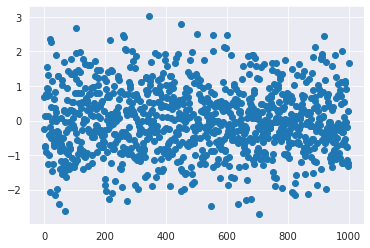

In [44]:
plt.plot(x.numpy() , 'o')

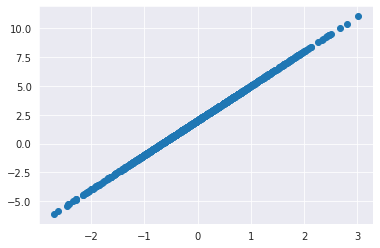

In [47]:
plt.plot(x.numpy() , y.numpy() , 'o')

Text(0.5, 1.0, 'Cross entropy')

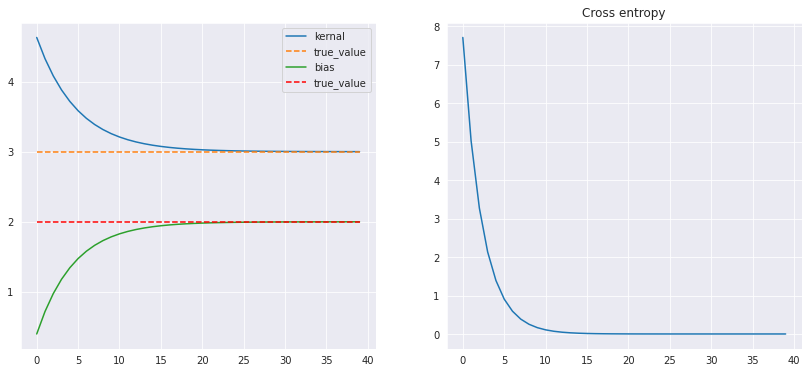

In [64]:
fig , ax = plt.subplots(1,2,figsize=(14,6))
ax[0].plot(history['w'] , label="kernal")
ax[0].plot([true_w]*40 , '--' , label="true_value")
ax[0].plot(history['b'] , label="bias")
ax[0].plot([true_b] * 40 , 'r--' , label="true_value")
ax[0].legend()

ax[1].plot(history['loss'])
ax[1].set_title("Cross entropy")